## Early stage Classification of Diabetes

# **About the Dataset**

The sourced dataset includes 16 attributes (Features) and one target variable named class.

1. Age: Age in years ranging from 16 t0 90
2. Gender: Male/Female
3. Polyuria: Yes/No
4. Polydipsia: Yes/No
5. Sudden Weight Loss: Yes/No
6. Weakness: Yes/No
7. Polyphagia: Yes/No
8. Genital Thrush: Yes/No
9. Visual Blurring: Yes/No
10. Itching: Yes/No
11. Irritability: Yes/No
12. Delayed Healing: Yes/No
13. Parial Paresis: Yes/No
14. Muscle Stiffness: Yes/No
15. Alopecia: Yes/No
16. Obesity: Yes/No

Class: Positive/Negative


In [1]:
#importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

In [2]:
Diabetes= pd.read_csv('diabetes_data_upload.csv') # loading the dataset

In [3]:
Diabetes.head(10) # Displays top 10 records of the dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


## Preparing the Dataset

1. Checking for missing/null values.
2. Examining the information in the columns.
3. The fundamental statistics of the numeric column.
4. Imputing/encoding the data (In this case, we'll convert Yes/No at the end because 0 and 1 in all the columns can be confusing).

In [4]:
Diabetes.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [5]:
Diabetes.isna().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [6]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [7]:
Diabetes.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


# EDA ( Explolatory Data Analysis)

**Gender Distribution**

In [8]:
pip show nbformat


Name: nbformat
Version: 5.10.4
Summary: The Jupyter Notebook format
Home-page: https://jupyter.org
Author: 
Author-email: Jupyter Development Team <jupyter@googlegroups.com>
License: BSD 3-Clause License

- Copyright (c) 2001-2015, IPython Development Team
- Copyright (c) 2015-, Jupyter Development Team

All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior writte

In [9]:
import plotly.express as px    # For Creating Interactive graphs

In [10]:
gendis= px.histogram(Diabetes, x = 'Gender', color = 'class', title="Postive/Negative count Vs Gender")
gendis.show()

In [11]:
pltbl= ['Gender', 'class']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[pltbl[0]],Diabetes[pltbl[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


Female patients have a higher positivity rate than male patients. We can safely conclude that this data set is biased toward female patients with a high positivity rate.

In [12]:
agehist= px.histogram(Diabetes, x='Age', color="class", title="Distribution of Postive cases with Ages")
agehist.show()

The data is free of skew. A normal distribution can be seen. The majority of positive cases are between the ages of 32 and 69.

In [13]:
genbox = px.box(Diabetes, y="Age", x="class", color="Gender", points="all", title= "Age Vs Positive/Negative")
genbox.show()

1. The median age for the positive rate in men is 53 years old. 16 is the minimum and 85 is the maximum. The age range of 35 to 67 years has a dense population of data points.

2. The positive rate's median age for females is 47 years old. The minimum and maximum values are 25 and 69 and we can also observe that there is a outlier in the female positive rate at the age of 90 respectively. Based on the box plot, we can fairly estimate that the majority of the positive cases in the dataset are between the ages of 35 and 61.

# Distribution of class (Target Variable)

In [14]:
clspi = px.pie(Diabetes, values='Age', names='class', title= "Ratio of Positive and Negative cases")
clspi.show()

In [15]:
print("Count of cases:", Diabetes['class'].value_counts())

Count of cases: class
Positive    320
Negative    200
Name: count, dtype: int64


From above we can say that the Dataset not imbalanced.

# Distribution of polyuria

In [16]:
polyuria=px.histogram(Diabetes, x = 'Polyuria', color = 'class', title="Polyuria")
polyuria.show()

plttbl_polyuria= ['Polyuria', 'class']
pm = sns.light_palette("orange", as_cmap=True)
(round(pd.crosstab(Diabetes[plttbl_polyuria[0]], Diabetes[plttbl_polyuria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = pm)

class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


1. There is a 76% chance that a patient with polyuria would have diabetes.
2. A patient has a 92% likelihood of not getting diabetes if they do not have polyuria.

# Distribution of Polydipsia

In [17]:
polydispia = px.histogram(Diabetes, x = 'Polydipsia', color = 'class', title="Increased consumption of water")
polydispia.show()

plttblpolydispia= ['Polydipsia', 'class']
rm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plttblpolydispia[0]], Diabetes[plttblpolydispia[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = rm)

class,Negative,Positive
Polydipsia,,
No,96.000000,29.690000
Yes,4.000000,70.310000


1. An individual's odds of acquiring diabetes are 70% if they have polydispia.
2. If a patient does not have polydispia, the chances of him or her not getting diabetes are 96%.
3. We may fairly conclude that polydipsia, which causes excessive thirst, and polyuria, which causes frequent urination, are correlated to each other. We can observe that patients who have polydipsia are more likely to have diabetes; the positive rate comes out to be about 70%.

# Distribution of Sudden Weight Loss

In [18]:
swl = px.histogram(Diabetes, x = 'sudden weight loss', color = 'class', title="Sudden weight loss")
swl.show()

plttblswl= ['sudden weight loss', 'class']
qm = sns.light_palette("yellow", as_cmap=True)
(round(pd.crosstab(Diabetes[plttblswl[0]], Diabetes[plttblswl[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = qm)

class,Negative,Positive
sudden weight loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


Due to unexpected weight loss, 58% of individuals are found to have diabetes. Some common illnesses can also be the cause of unexpected weight loss. This is an important feature but not as important as Polyuria or Polydispia.

# Distribution of Weakness

In [19]:
wkns = ['weakness', 'class']
sm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[wkns [0]],Diabetes[wkns [1]], normalize='columns') * 100,2)).style.background_gradient(cmap = sm)

class,Negative,Positive
weakness,,
No,56.500000,31.870000
Yes,43.500000,68.120000


1. The individual with weakness have a chance of 68% to be positive in Diabetes.

# Distribution of Polyphagia

In [20]:
eating = px.histogram(Diabetes, x = 'Polyphagia', color = 'class', title="Excessive eating")
eating.show()

plt_eating= ['Polyphagia', 'class']
tm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_eating[0]], Diabetes[plt_eating[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)

class,Negative,Positive
Polyphagia,,
No,76.000000,40.940000
Yes,24.000000,59.060000


1. With a positive percentage of 59% and a negative percentage of 76%, individuals with an obsessive eating disorder have a lower risk of developing diabetes.

# Distribution of genital thrush

In [21]:
gntlthrsh = px.histogram(Diabetes, x = 'Genital thrush',color='class')
gntlthrsh.show()

plt_thrsh= ['Genital thrush', 'class']
um = sns.light_palette("pink", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_thrsh[0]], Diabetes[plt_thrsh[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = um)



class,Negative,Positive
Genital thrush,,
No,83.500000,74.060000
Yes,16.500000,25.940000


# Analysis for the remaining features

1. Visual blurring
2. Itching
3. Irritability
4. Delayed healing
5. Partial paresis
6. Muscle stiffness
7. Alopecia
8. Obesity

# Data Processing

1. Encoding the categorical variable to nurmeric values (0's & 1's)

In [22]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score,confusion_matrix,recall_score,roc_auc_score
%matplotlib inline
from sklearn import model_selection

In [23]:
number = preprocessing.LabelEncoder()

In [24]:
dtacpy1 = Diabetes.copy()   # Duplicating the Dataset
dtacpy1.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [25]:
for i in dtacpy1:
    dtacpy1[i] = number.fit_transform(dtacpy1[i])

In [26]:
dtacpy1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [27]:
# Setting target variable
X = dtacpy1.drop(['class'],axis=1) # Independent
Y = dtacpy1['class'] # Dependent

In [28]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [29]:
Y.head()

,class
0,1
1,1
2,1
3,1
4,1


Age                   0.106419
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64


<Axes: title={'center': 'Correlation with target variable class'}>

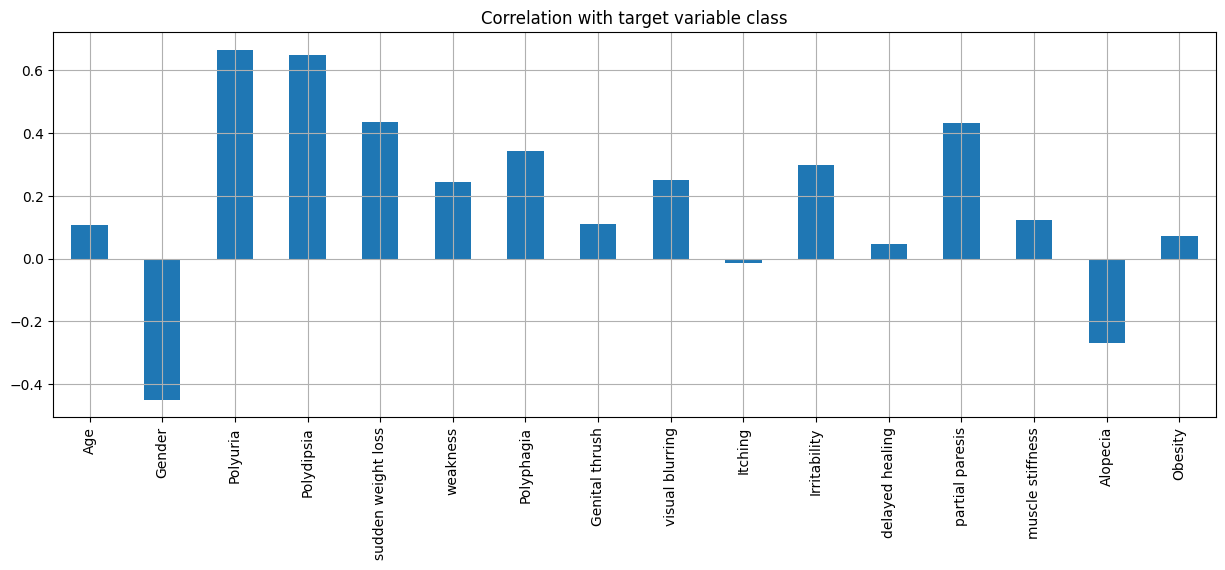

In [30]:
correlation = X.corrwith(Y)

print(correlation)

correlation.plot.bar(title="Correlation with target variable class", grid=True, figsize=(15,5))

We can see from the above graph that "Class" and the following factors have a strong correlation.

The attributes listed below are favorably correlated with the most closely related variables listed first.

1. Ployuria
2. Polydipsia
3. Sudden weight loss
4. partial paresis

Negatively correlated variables are not very significant. Meaning that the likelihood of the patient having diabetes is very minimal if you have tested positive for alopecia.

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify= Y, random_state = 1000)

In [32]:
## checking for the distribution of traget variable in train test split
print('Distribution of traget variable in training dataset')
print(Y_train.value_counts())

print('Distribution of traget variable in test dataset')
print(Y_test.value_counts())

Distribution of traget variable in training dataset
class
1    256
0    160
Name: count, dtype: int64
Distribution of traget variable in test dataset
class
1    64
0    40
Name: count, dtype: int64


# Data Normalization

In [33]:
min_max = MinMaxScaler()
X_train[['Age']] = min_max.fit_transform(X_train[['Age']])
X_test[['Age']] = min_max.transform(X_test[['Age']])

In [34]:
X_train.head()

#X_test.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
303,0.68,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1
443,0.22,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0
248,0.36,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
109,0.30,0,1,1,0,0,1,0,1,0,1,1,1,1,0,0
198,0.68,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1


# Model building



##Logistic Regression

In [35]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [36]:
logmodel = LogisticRegression()
logmodel.fit(X_train_LR, y_train_LR)

LogisticRegression()

In [37]:
predictions_LR = logmodel.predict(X_test_LR)

In [38]:
final_model_predictions_LR = pd.DataFrame({'Actual':y_test_LR, 'predictions':predictions_LR})

In [39]:
print(confusion_matrix(y_test_LR, predictions_LR))
print(classification_report(y_test_LR, predictions_LR))
print("----------------------------------------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------------------------------------")
accuracy_LR=metrics.accuracy_score( final_model_predictions_LR.Actual, final_model_predictions_LR.predictions )*100
accuracy_LR='{:.2f}'.format(accuracy_LR)
print( 'Total Accuracy : ',accuracy_LR)
recall_LR=metrics.recall_score(final_model_predictions_LR.Actual, final_model_predictions_LR.predictions,average='micro' )
print('recall',recall_LR)
Precision_LR=metrics.precision_score(final_model_predictions_LR.Actual, final_model_predictions_LR.predictions,average='micro' )
print('Precision',Precision_LR)

[[ 48   4]
 [  4 100]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        52
           1       0.96      0.96      0.96       104

    accuracy                           0.95       156
   macro avg       0.94      0.94      0.94       156
weighted avg       0.95      0.95      0.95       156

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
Total Accuracy :  94.87
recall 0.9487179487179487
Precision 0.9487179487179487


## Decision Tree Classifier


In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
decision_Tree_Classifier = DecisionTreeClassifier (random_state = 0)

In [42]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [43]:
decision_Tree_Classifier.fit(X_train_DT, y_train_DT)

DecisionTreeClassifier(random_state=0)

In [44]:
# predicting a new value

# test the output by changing values, like 3750
y_pred_DT = decision_Tree_Classifier.predict(X_test_DT)

In [45]:
final_model_predictions_DT = pd.DataFrame({'Actual':y_test_DT, 'predictions':y_pred_DT})

In [46]:
final_model_predictions_DT.head()

,Actual,predictions
304,1,1
332,0,0
78,1,1
380,1,1
515,1,1


In [47]:
print(confusion_matrix(y_test_DT, y_pred_DT))
print(classification_report(y_test_DT, y_pred_DT))

[[50  2]
 [ 5 99]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        52
           1       0.98      0.95      0.97       104

    accuracy                           0.96       156
   macro avg       0.94      0.96      0.95       156
weighted avg       0.96      0.96      0.96       156



In [48]:
accuracy_DT=( metrics.accuracy_score( final_model_predictions_DT.Actual, final_model_predictions_DT.predictions  ))*100
accuracy_DT='{:.2f}'.format(accuracy_DT)
print( 'Total Accuracy : ',accuracy_DT)
recall_DT=metrics.recall_score(final_model_predictions_DT.Actual, final_model_predictions_DT.predictions,average='micro' )
print('recall',recall_DT)
Precision_DT=metrics.precision_score(final_model_predictions_DT.Actual, final_model_predictions_DT.predictions,average='micro' )
print('Precision',Precision_DT)

Total Accuracy :  95.51
recall 0.9551282051282052
Precision 0.9551282051282052


## Support Vector Classifier

In [49]:
X_train_SVC, X_test_SVC, y_train_SVC, y_test_SVC = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [50]:
from sklearn.svm import SVC # "Support Vector Classifier"
clfsvm = SVC(kernel='linear')

In [51]:
# fitting x samples and y classes
clfsvm.fit(X_train_SVC,y_train_SVC)

SVC(kernel='linear')

In [52]:
y_pred_SVC=clfsvm.predict(X_test_SVC)

In [53]:
final_model_predictions_SVC = pd.DataFrame({'Actual':y_test_SVC, 'predictions':y_pred_SVC})

In [54]:
# how did our model perform?
count_misclassified = (y_test_SVC != y_pred_SVC).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_SVC = metrics.accuracy_score(y_test_SVC, y_pred_SVC)
print('Accuracy: {:.2f}'.format(accuracy_SVC))

Misclassified samples: 13
Accuracy: 0.92


In [55]:
print(confusion_matrix(y_test_SVC, y_pred_SVC))
print(classification_report(y_test_SVC, y_pred_SVC))
print("-----------------------------------------------------------------------------------------------------------------------")

print("-----------------------------------------------------------------------------------------------------------------------")
accuracy_SVC=metrics.accuracy_score( final_model_predictions_SVC.Actual, final_model_predictions_SVC.predictions  )*100
accuracy_SVC='{:.2f}'.format(accuracy_SVC)
print( 'Total Accuracy : ',accuracy_SVC)
recall_SVC=metrics.recall_score(final_model_predictions_SVC.Actual, final_model_predictions_SVC.predictions,average='micro' )
print('recall',recall_SVC)
Precision_SVC=metrics.precision_score(final_model_predictions_SVC.Actual, final_model_predictions_SVC.predictions,average='micro' )
print('Precision',Precision_SVC)

[[47  5]
 [ 8 96]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        52
           1       0.95      0.92      0.94       104

    accuracy                           0.92       156
   macro avg       0.90      0.91      0.91       156
weighted avg       0.92      0.92      0.92       156

-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------
Total Accuracy :  91.67
recall 0.9166666666666666
Precision 0.9166666666666666


In [56]:
table=pd.DataFrame({"Accuracy":[accuracy_DT,accuracy_SVC,accuracy_LR],
                    "Recall":[recall_DT,recall_SVC,recall_LR],
                    "Precision ":[Precision_DT,Precision_SVC,Precision_LR]},
                   index=["Decision Tree Classifier","Support Vector Classifier","Logistic Regression"])
table

,Accuracy,Recall,Precision
Decision Tree Classifier,95.51,0.955128,0.955128
Support Vector Classifier,91.67,0.916667,0.916667
Logistic Regression,94.87,0.948718,0.948718


## K-Nearest Neighbors Algorithm


In [73]:
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train_KNN, y_train_KNN)

KNeighborsClassifier(n_neighbors=2)

In [75]:
y_pred_knn = classifier.predict(X_test_KNN)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_KNN, y_pred_knn))
print(classification_report(y_test_KNN, y_pred_knn))

[[49  3]
 [21 83]]
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        52
           1       0.97      0.80      0.87       104

    accuracy                           0.85       156
   macro avg       0.83      0.87      0.84       156
weighted avg       0.88      0.85      0.85       156



In [77]:
final_model_predictions_knn = pd.DataFrame({'Actual':y_test_KNN, 'predictions':y_pred_knn})

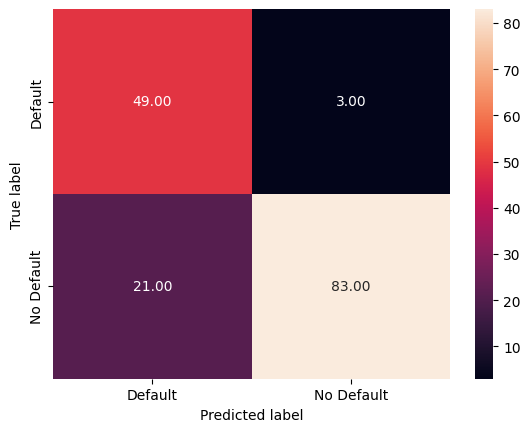

In [78]:
draw_cm( final_model_predictions_knn.Actual, final_model_predictions_knn.predictions )   # correct 0 is sensitivity and correct is specificity

In [79]:
accuracy_knn=metrics.accuracy_score( final_model_predictions_knn.Actual, final_model_predictions_knn.predictions)*100+
accuracy_knn='{:.2f}'.format(accuracy_knn)
print( 'Total Accuracy : ',accuracy_knn)
recall_knn=metrics.recall_score(final_model_predictions_knn.Actual, final_model_predictions_knn.predictions )
print('recall',recall_knn)
Precision_knn=metrics.precision_score(final_model_predictions_knn.Actual, final_model_predictions_knn.predictions )
print('Precision',Precision_knn)

Total Accuracy :  84.62
recall 0.7980769230769231
Precision 0.9651162790697675


In [80]:
cm2 = metrics.confusion_matrix( final_model_predictions_knn.Actual, final_model_predictions_knn.predictions)

sensitivity = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', round( specificity, 2 ) )

Sensitivity :  0.94
Specificity :  0.8


In [86]:
table=pd.DataFrame({"Accuracy":[accuracy_knn,accuracy_DT,accuracy_SVC,accuracy_LR],
                    "Recall":[recall_knn,recall_DT,recall_SVC,recall_LR],
                    "Precision ":[Precision_knn,Precision_DT,Precision_SVC,Precision_LR]},
                   index=["KNN","Decision Tree Classifier","Support Vector Classifier","Logistic Regression"])
table

,Accuracy,Recall,Precision
KNN,84.62,0.798077,0.965116
Decision Tree Classifier,95.51,0.955128,0.955128
Support Vector Classifier,91.67,0.916667,0.916667
Logistic Regression,94.87,0.948718,0.948718
